# Pipeline Project

"StyleSense", a rapidly growing online women's clothing retailer. StyleSense is known for its trendy and affordable fashion, and its customer base has exploded in recent months. This influx of new customers is fantastic for business, but it has created a challenge: a backlog of product reviews with missing data. Customers are still leaving valuable feedback in the text of their reviews, but they aren't always indicating whether they recommend the product.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [2]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [3]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [4]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=42,
)

## Your Work:

In [5]:
from __future__ import annotations
# !python -m spacy download en_core_web_sm

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')

## Building a Pipeline: Splitting Numerical, Categorical, and Text Data

Need to separate the data into the different feature types so we can better
process & utilize them as features for our model.
Depending on the situation, you may instead only use certain features & feature
types or even do more feature engineering by combining the given data columns!

However, in this scenario, we're going to have you define the following feature
groups:

- Numerical: `num_features`
- Categorical: `cat_features`
- Text: `text_features`

In [7]:
# TODO: split data into numerical, categorical, and text features

num_features = (
    X
    .select_dtypes(exclude=['object']).columns
    .drop(
        [
            'Clothing ID',
        ],
    )
)
print('Numerical features:', num_features)

cat_features = (
    X[[
        'Division Name',
        'Department Name',
        'Class Name',
    ]].columns
)
print('Categorical features:', cat_features)

text_features = (
    X[[
        'Title',
        'Review Text',
    ]].columns
)
print ('Text features:', text_features)

Numerical features: Index(['Age', 'Positive Feedback Count'], dtype='object')
Categorical features: Index(['Division Name', 'Department Name', 'Class Name'], dtype='object')
Text features: Index(['Title', 'Review Text'], dtype='object')


## Data Exploration

In [8]:
data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Recommended IND            0
dtype: int64

In [9]:
data.nunique()

Clothing ID                  531
Age                           77
Title                      13142
Review Text                18439
Positive Feedback Count       79
Division Name                  2
Department Name                6
Class Name                    14
Recommended IND                2
dtype: int64

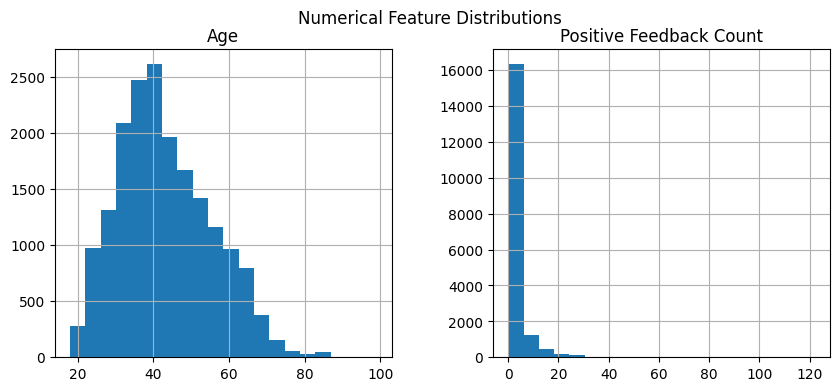

In [10]:
# Numerical Features Distribution
import matplotlib.pyplot as plt
data[['Age', 'Positive Feedback Count']].hist(bins=20, figsize=(10, 4))
plt.suptitle("Numerical Feature Distributions")
plt.show()


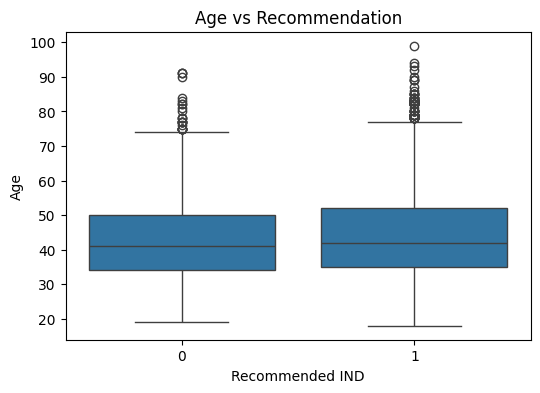

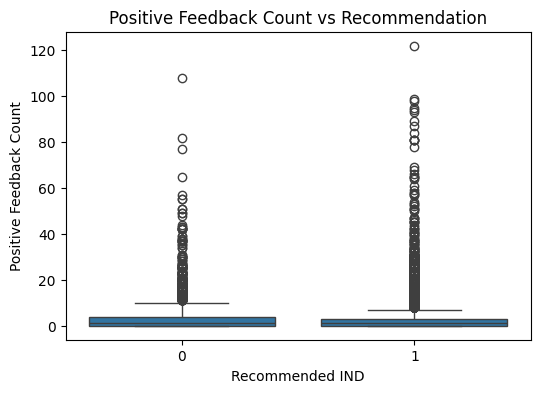

In [11]:
# Boxplots for numerical vs target
import seaborn as sns
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Recommended IND", y=col, data=data)
    plt.title(f"{col} vs Recommendation")
    plt.show()

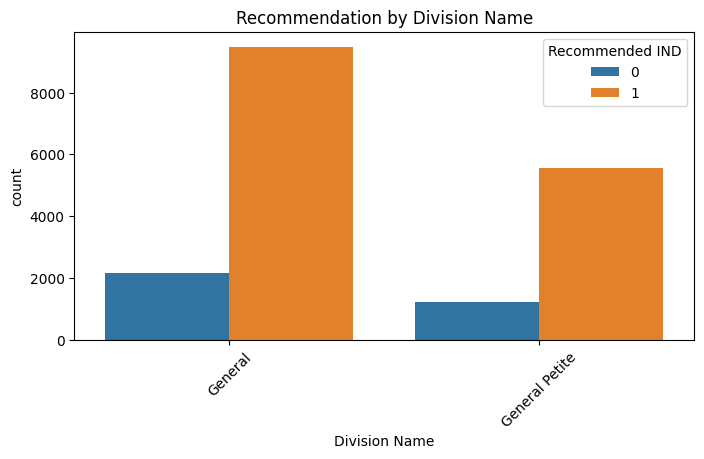

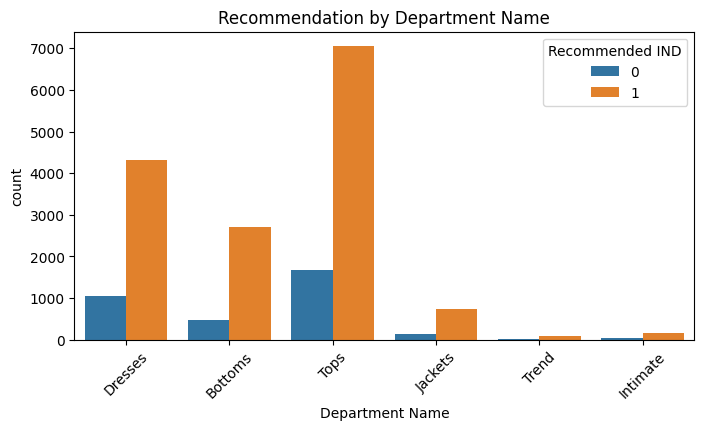

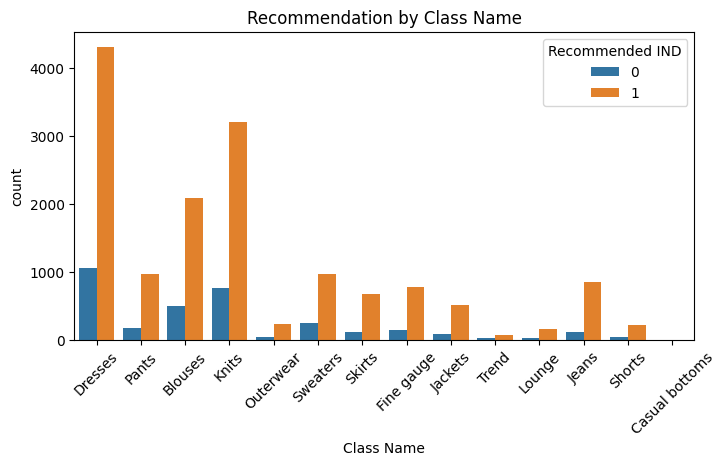

In [12]:
# Categorical Feature Exploration
cat_features = ['Division Name', 'Department Name', 'Class Name']
for col in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue="Recommended IND", data=data)
    plt.xticks(rotation=45)
    plt.title(f"Recommendation by {col}")
    plt.show()

## Building Pipeline

Need to separate the data into the different feature types so we can better
process & utilize them as features for our model.
Depending on the situation, you may instead only use certain features & feature
types or even do more feature engineering by combining the given data columns!

However, in this scenario, we're going to define the following feature
groups:

- Numerical: `num_features`
- Categorical: `cat_features`
- Text: `text_features`

In [13]:
# This will be useful to use in creating a pipeline
from sklearn.pipeline import Pipeline

In [14]:
# TODO: define pipeline for numerical features called `num_pipeline``
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

num_pipeline = Pipeline([
    (
        'imputer', 
        SimpleImputer(strategy='median'),
    ),
    (
        'scalar', 
        MinMaxScaler(),
    ),
])

num_pipeline

,steps,"[('imputer', ...), ('scalar', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,feature_range,"(0, ...)"


In [15]:
# TODO: define pipeline for categorical features called `cat_pipeline`
cat_pipeline = Pipeline([
    (
        'imputer', 
        SimpleImputer(
            strategy='most_frequent',
        ),
    ),
    (
        'cat_encoder', 
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        ),
    ),
])

cat_pipeline

,steps,"[('imputer', ...), ('cat_encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,'auto'


## Text Feature Pipeline

For the text part of the pipeline, there are multiple ways we can process the pipeline.
We specifically are going to utilize spaCy and some built-in Python functions to process the text in our custom Scikit-learn Transformers

## Custom Transformer: Count Characters

Create a CountCharacter() Scikit-learn Transformer using BaseEstimator and TransformerMixin.
This custom Transformer will take in a string for a character to return the number of times a certain character appears in the text input. This way we have a way to see how many times a certain character (like an exclamation point !) appears.

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
# TODO: create CountCharacter()
# Takes in a string for the character to count
# Outputs the number times that character appears in the text


class CountCharacter(BaseEstimator, TransformerMixin):
    def __init__(self, character: str):
        self.character = character

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [[text.count(self.character)] for text in X]

Use `CountCharacter()` to create a feature for the following:

- Number of spaces in the text
- Number of exclamations (`!`) in the text
- Number of question marks (`?`) in the text

Please refer [`FeatureUnion`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html).

> Note:
> `initial_text_preprocess` is used to make sure the text is in the
> expected shape for `CountCharacter()`.

In [17]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# --- Custom transformer to count characters ---
class CountCharacter(BaseEstimator, TransformerMixin):
    def __init__(self, character):
        self.character = character

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # X is a 1D array of text strings
        return [[text.count(self.character)] for text in X]


# --- Pipeline for each text column ---
def make_character_count_pipeline(column_name):
    return Pipeline([
        ('select_column', FunctionTransformer(lambda X: X[column_name].values, validate=False)),
        ('reshape', FunctionTransformer(np.ravel, validate=False)),
        ('feature_engineering', FeatureUnion([
            ('count_spaces', CountCharacter(character=' ')),
            ('count_exclamations', CountCharacter(character='!')),
            ('count_question_marks', CountCharacter(character='?')),
        ])),
    ])


# --- Combine for both Title and Review Text ---
character_counts_pipeline = FeatureUnion([
    ('title_counts', make_character_count_pipeline('Title')),
    ('review_counts', make_character_count_pipeline('Review Text')),
])


### Custom `Transformer`: spaCy and TF-IDF

Next, use TF-IDF to get a vector representation of the review text.

Before that use TF-IDF, and simplify the text with lemmatization. This way
words like 'good' and 'better' are converted to the same value. This
representation will carry over into TF-IDF.

Create a custom `Transformer` called `SpacyLemmatizer()` to lemmatize the text
given.
Then in `tfidf_pipeline`, use `SpacyLemmatizer()` followed by
a [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
in the pipeline

> Note:
> As before, `initial_text_preprocess` used to ensure the text is
> in te expected shape for `SpacyLemmatizer()`.

In [18]:
# TODO: Create SpacyLemmatizer
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        lemmatized = [
            ' '.join(
                token.lemma_ for token in doc
                if not token.is_stop
            )
            for doc in self.nlp.pipe(X)
        ]
        return lemmatized


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

def concat_text(data):
    return (data["Title"].fillna("") + " " + data["Review Text"].fillna("")).values

tfidf_pipeline = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            concat_text,
            validate=False,
        ),
    ),
    (
        'lemmatizer',
        SpacyLemmatizer(nlp=nlp),
    ),
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            max_features=5000, 
            ngram_range=(1,2),
            stop_words='english',
        ),
    ),
])
tfidf_pipeline 

,steps,"[('dimension_reshaper', ...), ('lemmatizer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function con...001BEF96CFD80>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


## Combine Feature Engineering Pipelines

In [20]:
from sklearn.compose import ColumnTransformer

from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('character_counts', character_counts_pipeline, text_features),
        ('tfidf_text', tfidf_pipeline, text_features),
])

feature_engineering

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


## Training Pipeline

Append the feature engineering pipeline to a
machine learning model (a classifier) which is to be trained.

Use a
[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
but in practice, you may use a another kind of model with the features.

In [21]:
from sklearn.ensemble import RandomForestClassifier

full_pipeline = Pipeline([
    ('features', feature_engineering),
    ('clf', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )),
])

## Evaluate Model

In [22]:

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Train
full_pipeline.fit(X_train, y_train)

# Predict
y_pred = full_pipeline.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision, Recall, F1-Score:", precision_recall_fscore_support(y_test, y_pred, average='weighted'))


C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8737127371273713
Precision, Recall, F1-Score: (0.8706394454267398, 0.8737127371273713, 0.8552083125231532, None)


## Fine-Tuning Pipeline

Finally, we can use a parameter search to better adjust our model.

Using either 
[`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
or
[`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
allows us to use cross-validation (CV) to better evaluate different models
independent of the test set.

After finding the best parameters based on our search, we can use this
fine-tuned model against the test set to observe its performance.

----

Note that parameter searches can take a significant amount of time. In `RandomizedSearchCV`, we can specify a number of iterations over a set of parameter combinations.

In [23]:
from sklearn.model_selection import RandomizedSearchCV

# TODO: set parameters to randomly search over
# A couple parameters with 2-5 options each is plenty
my_distributions = dict(

    randomforestclassifier__max_features=[
        100,
        150,
        250,
    ],
    randomforestclassifier__n_estimators=[
        150,
        200,
    ],
)


In [24]:
param_search = RandomizedSearchCV(
    estimator=full_pipeline,   
    param_distributions={
        "clf__n_estimators": [100, 200, 500],
        "clf__max_depth": [None, 10, 20, 30],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4],
    },
    n_iter=10,
    cv=5,
    scoring="accuracy",
    verbose=3,
    n_jobs=-1,
    refit=True,
    random_state=42,
)


param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'clf__n_estimators': 200,
 'clf__min_samples_split': 5,
 'clf__min_samples_leaf': 1,
 'clf__max_depth': None}

In [25]:
model_best = param_search.best_estimator_
model_best

,steps,"[('features', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
y_pred_forest_pipeline = model_best.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_forest_pipeline))
print("Precision, Recall, F1-Score:", precision_recall_fscore_support(y_test, y_pred_forest_pipeline, average='weighted'))

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8710027100271003
Precision, Recall, F1-Score: (0.8660645065860832, 0.8710027100271003, 0.8525460181803953, None)
